In [1]:
#import warnings
import sys
sys.path.append("../..")

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implemen

In [2]:
path_interf = os.pardir+"/data/input_data/AlesModel/2018_interf.csv"
path_orient = os.pardir+"/data/input_data/AlesModel/2018_orient_clust_n_init5_0.csv"
path_dem = os.pardir+"/data/input_data/AlesModel/_cropped_DEM_coarse.tif"

In [3]:
resolution = [10,10,10]
extent = np.array([729550.0, 751500.0, 1913500.0, 1923650.0, -3000.0, 1500.0])
geo_model = gp.create_model('Alesmodel')
gp.init_data(geo_model, extent = extent, resolution = resolution,
                        path_i = path_interf,
                        path_o = path_orient)

Active grids: ['regular']


../..\gempy\core\data.py:1623: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


Alesmodel  2019-09-09 13:55

In [4]:
sdict = {'section1':([732000, 1916000],[745000,1916000],[200,150])}
        #'section2':([740000, 1916000],[745000,1917000],[20,20])} 
geo_model.grid.set_section_grid(sdict)

,start,stop,resolution
section1,"[732000, 1916000]","[745000, 1916000]","[200, 150]"


In [5]:
print(len(geo_model.orientations.df))
print(len(geo_model.surface_points.df))
print(len(geo_model.surfaces.df))

198
126
7


In [6]:
#sorting of lithologies
gp.map_series_to_surfaces(geo_model,{'fault_left':('fault_left'),
                        'fault_right':('fault_right'),
                        'fault_lr':('fault_lr'),
                        'Trias_Series':('TRIAS','LIAS'), 
                        'Carbon_Series':('CARBO'), 
                        'Basement_Series':('basement')},remove_unused_series=True)

,surface,series,order_surfaces,isBasement,color,id
0,fault_left,fault_left,1,False,#015482,1
2,fault_right,fault_right,1,False,#ffbe00,2
1,fault_lr,fault_lr,1,False,#9f0052,3
3,TRIAS,Trias_Series,1,False,#728f02,4
4,LIAS,Trias_Series,2,False,#443988,5
5,CARBO,Carbon_Series,1,False,#ff3f20,6
6,basement,Basement_Series,1,True,#325916,7


In [7]:
colordict = {'LIAS':'#015482', 'TRIAS': '#9f0052', 'CARBO':'#ffbe00','basement':'#728f02',
            'fault_left':'#2a2a2a','fault_right':'#545454', 'fault_lr': '#a5a391'}
geo_model.surfaces.colors.change_colors(colordict)

,surface,series,order_surfaces,isBasement,color,id
0,fault_left,fault_left,1,False,#2a2a2a,1
2,fault_right,fault_right,1,False,#545454,2
1,fault_lr,fault_lr,1,False,#a5a391,3
3,TRIAS,Trias_Series,1,False,#9f0052,4
4,LIAS,Trias_Series,2,False,#015482,5
5,CARBO,Carbon_Series,1,False,#ffbe00,6
6,basement,Basement_Series,1,True,#728f02,7


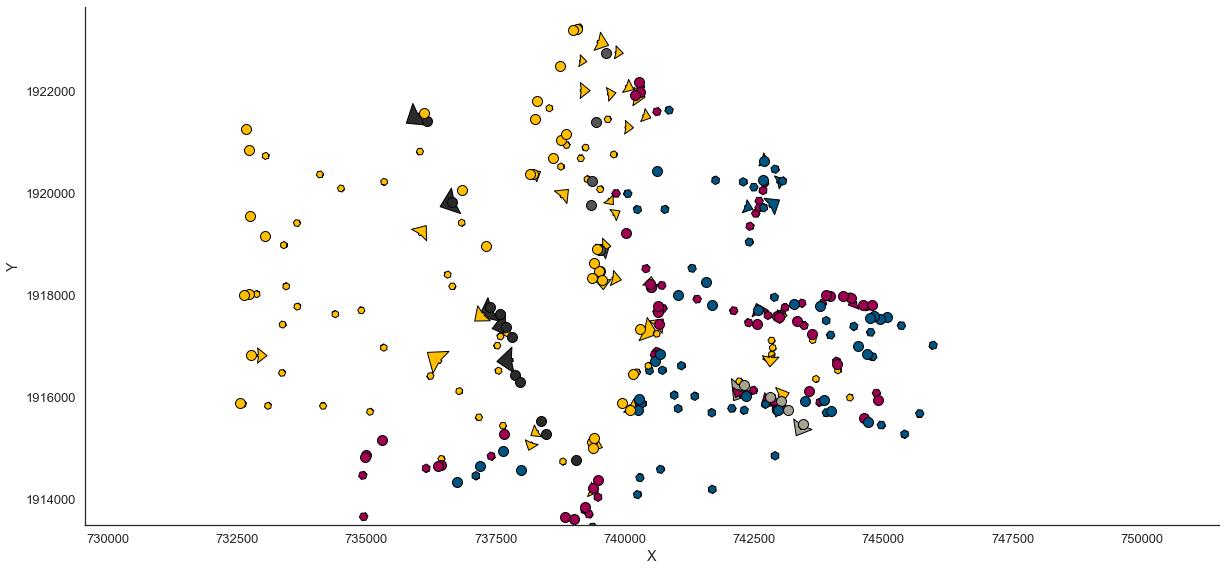

In [8]:
a = gp.plot.plot_data(geo_model,direction='z')

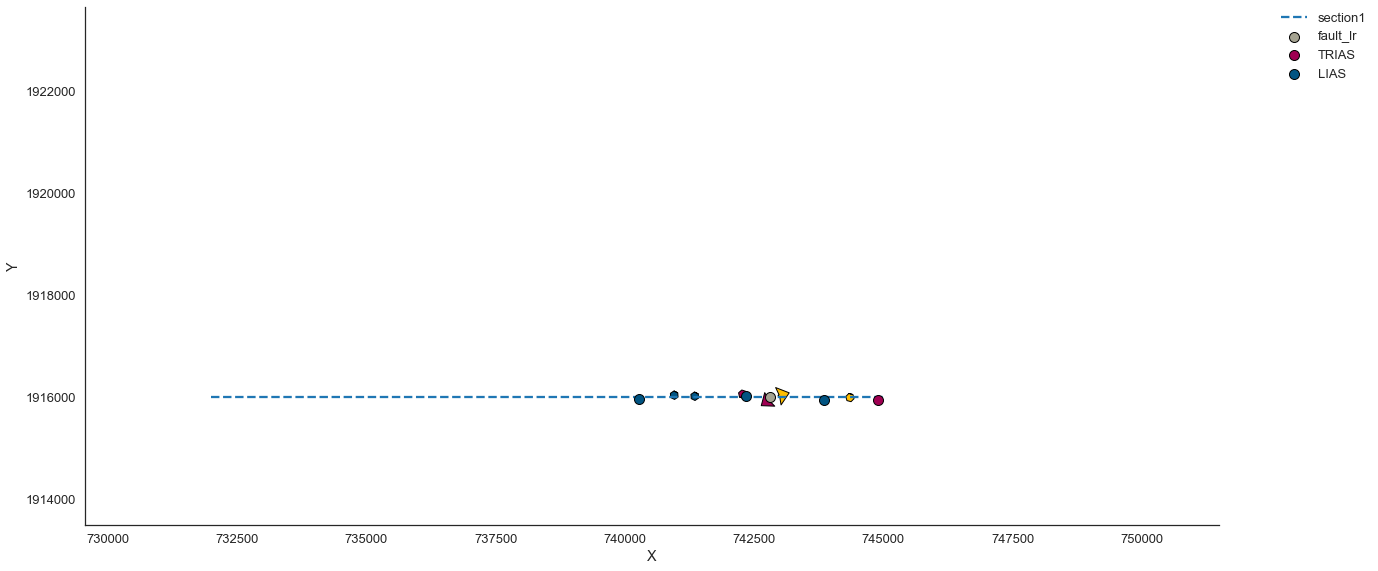

In [9]:
gp.plot.plot_section_traces(geo_model, contour_lines=True, show_all_data=False)

##### Faults

In [10]:
geo_model.set_is_fault(['fault_right', 'fault_left', 'fault_lr'], change_color=False)

,isFault,isFinite
fault_left,True,False
fault_right,True,False
fault_lr,True,False
Trias_Series,False,False
Carbon_Series,False,False
Basement_Series,False,False


In [11]:
gp.set_interpolation_data(geo_model,
                          output='geology', compile_theano=True,
                          theano_optimizer='fast_run',
                          verbose=[])

Compiling theano function...
Compilation Done!


### Topography

Cropped raster to geo_model.grid.extent.
storing converted file...
Active grids: ['regular' 'topography' 'sections']


Grid Object. Values: 
array([[ 7.30647500e+05,  1.91400750e+06, -2.77500000e+03],
       [ 7.30647500e+05,  1.91400750e+06, -2.32500000e+03],
       [ 7.30647500e+05,  1.91400750e+06, -1.87500000e+03],
       ...,
       [ 7.45000000e+05,  1.91600000e+06,  1.43959732e+03],
       [ 7.45000000e+05,  1.91600000e+06,  1.46979866e+03],
       [ 7.45000000e+05,  1.91600000e+06,  1.50000000e+03]])

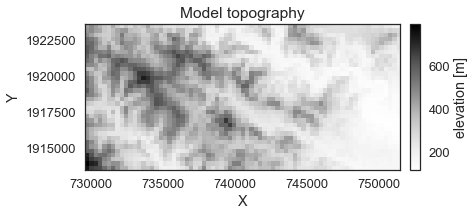

In [12]:
geo_model.set_topography(source='gdal', filepath=path_dem)

In [13]:
_=gp.compute_model(geo_model, compute_mesh=False)

p1 [729550.0, 1917560.0] p2 [751500.0, 1917560.0]


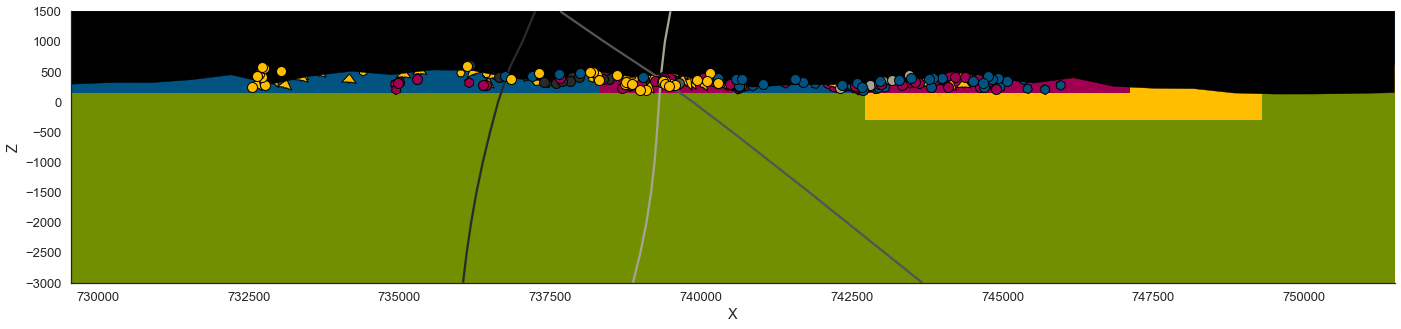

In [14]:
gp.plot.plot_section(geo_model, 4, direction='y',show_topo=True, show_data=True, show_faults=True, show_all_data=True)

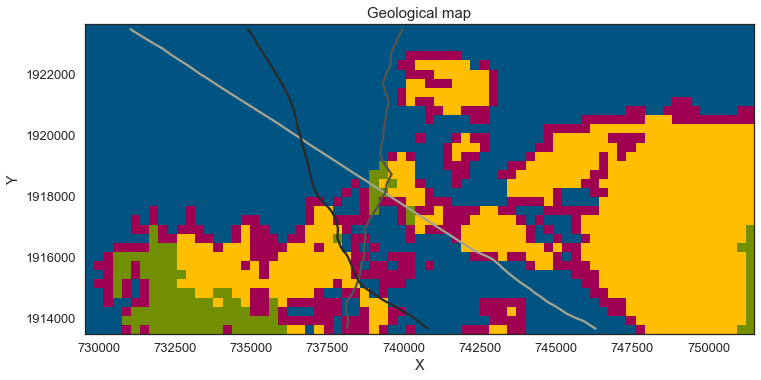

In [16]:
gp.plot.plot_map(geo_model, show_data=False, contour_lines=False, show_faults=True)